In [1]:
import torch 
from torch import nn
import matplotlib.pyplot as plt


In [2]:
# Device agnostic code 
device = ("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device : {device}")

Using device : cpu


In [3]:
weight = 0.5
bias = 0.2

start = 0 
end = 1
step = 0.02

X = torch.arange(start,end,step).unsqueeze(1)
y = weight * X + bias

In [4]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,
                                 y,
                                 test_size = 0.2)

In [5]:
def viz(train_data = X_train,
        train_label = y_train,
        test_data = X_test,
        test_label = y_test,
        inference = None) :

    plt.figure(figsize=(14,10))
    plt.scatter(train_data,train_label, color = "red", label = "Training data")
    plt.scatter(test_data,test_label, color = "green", label = "testing data")
    plt.grid(True, linestyle = "--")

    if inference is not None :
        plt.scatter(test_data,inference, color = "black")
    plt.legend() 

In [13]:
class Linear(nn.Module) :
    def __init__(self) -> None:
        super().__init__()   
        self.Linear_layer = nn.Linear(in_features = 1,
                                      out_features = 1)

    def forward(self,X):
        return self.Linear_layer(X)        

In [14]:
torch.manual_seed(42)
model = Linear()   
loss_function = nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(),
                            lr = 0.01)

In [ ]:
epoch = 1000

for epoch in range(epoch):
    model.train()
    y_pred = model(X_train)
    optimizer.zero_grad()
    loss_func = loss_function(y_pred,y_train)
    loss_func.backward() 
    optimizer.step()

    #Testing
    model.eval()
    with torch.inference_mode():
        test_pred = model(X_test)
        test_loss = loss_function(test_pred,y_test)

    if epoch%10 == 0:
        print(f"epoch : {epoch} | loss : {loss_func} | test loss : {test_loss}")




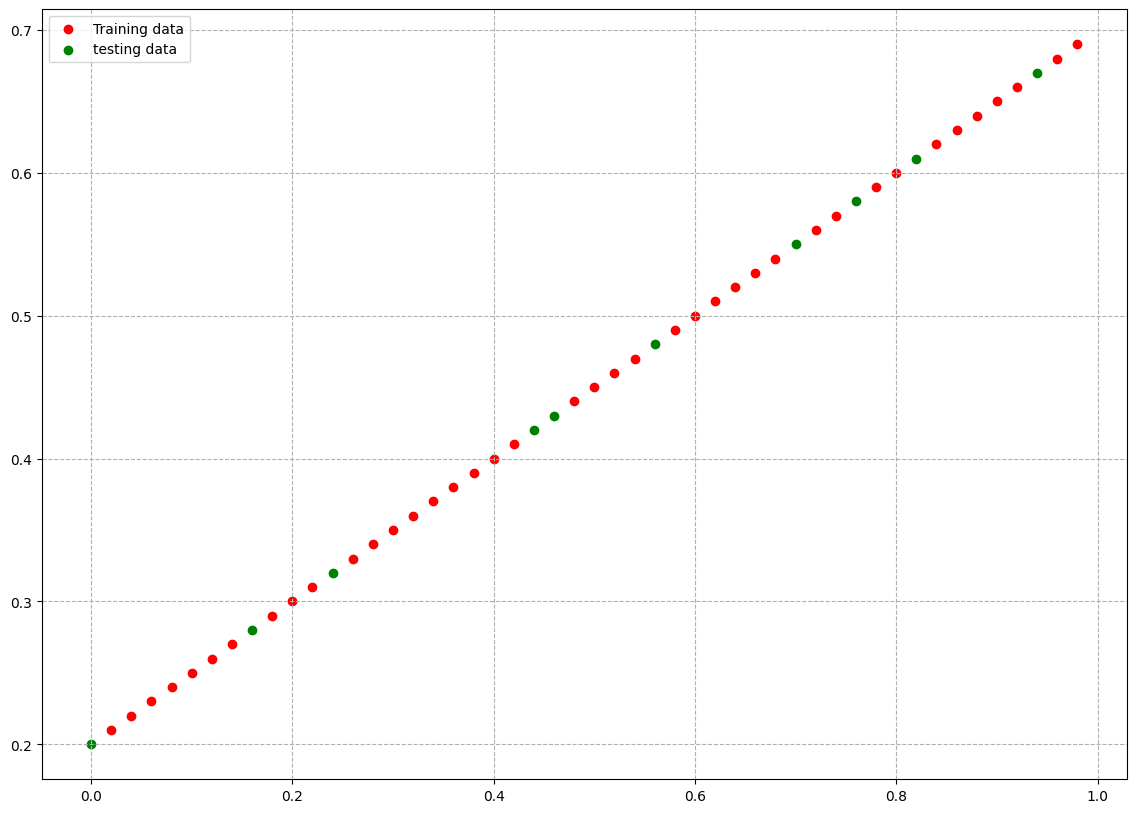

In [20]:
viz()